In [1]:
#Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

In [3]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [4]:
#fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

C:\Users\USER\AppData\Local\Temp\ipykernel_14000\2822573819.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid =np.arange(min(X),max(X),0.01).reshape(-1,1)


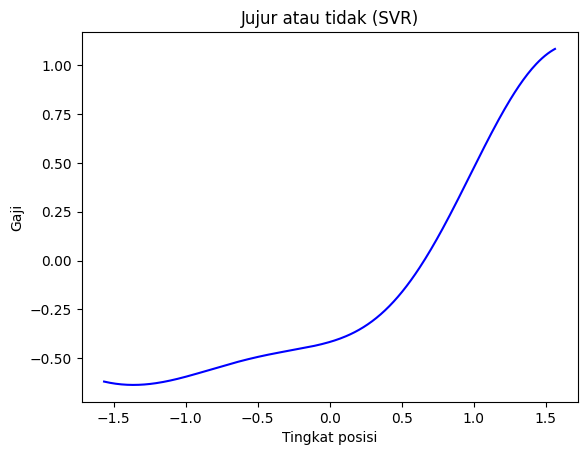

In [5]:
#Visualisasikan hasil SVT (resolusi tinggi dan kurva yang lebih halus)
X_grid =np.arange(min(X),max(X),0.01).reshape(-1,1)
plt.plot (X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

In [6]:
#Prediksi hasil
#Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
#Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
#gaji_prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
#kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1,1))

In [8]:
#Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actually = y
y_pred = regressor.predict(X)

#Menghitung MAE
mae = mean_absolute_error(y_actually, y_pred)

#Menghitung MSE
mse = mean_squared_error(y_actually, y_pred)

#Menghitung RMSE
rmse = np.sqrt(mse)

#Menghitung R-squared
r2 = r2_score(y_actually, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798
